In [4]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [5]:
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
# from skmultilearn.adapt import MLkNN
import sklearn.metrics as metrics
from sklearn.metrics import hamming_loss, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import multilabel_confusion_matrix
import os

In [6]:
d2= pd.read_csv("/home/yadagiri/kaggletestdata1.csv")

In [7]:
d2

,text,label
0,California is the biggest example of city plan...,1
1,A life without cars sure sounds like a great i...,0
2,Cars are used used in everyday life but they m...,0
3,The electoral collage should be disbanded. Not...,0
4,"Dear Mr.Mrs. Senator, The Electoral College is...",0
...,...,...
2489,"Dear Florida senator, It is in the interest of...",0
2490,Driving can be a huge hassle. Having to spend ...,0
2491,"Dear\nSenator,\n\nI am writing to express my o...",1
2492,"The electoral college is pointless, I believe ...",0


In [12]:
d2.rename(columns={'input': 'text', 'output': 'label'}, inplace=True)


In [13]:
d2

,S.no,text,label
0,0,California is the biggest example of city plan...,1
1,1,A life without cars sure sounds like a great i...,0
2,2,Cars are used used in everyday life but they m...,0
3,3,The electoral collage should be disbanded. Not...,0
4,4,"Dear Mr.Mrs. Senator, The Electoral College is...",0
...,...,...,...
2489,2489,"Dear Florida senator, It is in the interest of...",0
2490,2490,Driving can be a huge hassle. Having to spend ...,0
2491,2491,"Dear\nSenator,\n\nI am writing to express my o...",1
2492,2492,"The electoral college is pointless, I believe ...",0


In [14]:
d2.drop(columns=['S.no'], inplace=True)

In [15]:
d2

,text,label
0,California is the biggest example of city plan...,1
1,A life without cars sure sounds like a great i...,0
2,Cars are used used in everyday life but they m...,0
3,The electoral collage should be disbanded. Not...,0
4,"Dear Mr.Mrs. Senator, The Electoral College is...",0
...,...,...
2489,"Dear Florida senator, It is in the interest of...",0
2490,Driving can be a huge hassle. Having to spend ...,0
2491,"Dear\nSenator,\n\nI am writing to express my o...",1
2492,"The electoral college is pointless, I believe ...",0


In [16]:
d2.to_csv('/home/yadagiri/kaggletestdata1.csv', index=False)

In [17]:
d2

,text,label
0,California is the biggest example of city plan...,1
1,A life without cars sure sounds like a great i...,0
2,Cars are used used in everyday life but they m...,0
3,The electoral collage should be disbanded. Not...,0
4,"Dear Mr.Mrs. Senator, The Electoral College is...",0
...,...,...
2489,"Dear Florida senator, It is in the interest of...",0
2490,Driving can be a huge hassle. Having to spend ...,0
2491,"Dear\nSenator,\n\nI am writing to express my o...",1
2492,"The electoral college is pointless, I believe ...",0


In [8]:
## Word Pre-Processing ##
import nltk
nltk.download('stopwords')
import string
import re
wpt = nltk.WordPunctTokenizer()
stop_words_init = nltk.corpus.stopwords.words('english')
stop_words = [i for i in stop_words_init if i not in ('not','and','for')]
print(stop_words)
## Function to normalize text for pre-processing ##
def normalize_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    text = re.sub('<.*?>+', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    return text
## Apply the written function ##
d2['text'] = d2['text'].apply(lambda x: normalize_text(x))
processed_list = []
for j in d2['text']:
    process = j.replace('...','')
    processed_list.append(process)

df_processed = pd.DataFrame(processed_list)
df_processed.columns = ['text']
df_processed.head(n=5)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/yadagiri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't

,text
0,california is the biggest example of city plan...
1,a life without cars sure sounds like a great i...
2,cars are used used in everyday life but they m...
3,the electoral collage should be disbanded not...
4,dear mr mrs senator the electoral college is...


In [9]:
num_folds = 5
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

Train Test Splits


In [10]:
X = list(df_processed['text'])
#y = np.asarray(d1[d1.columns[1:]])
y_data = d2[d2.columns[1:2]]
y = y_data.values

In [11]:
y

array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

Model CNN & Bi-LSTM

In [15]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [24]:
# Model CNN & Bi-LSTM
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Activation, Dropout, Dense, Flatten, Bidirectional, GRU, concatenate, SpatialDropout1D
from tensorflow.keras.layers import GlobalMaxPooling1D, GlobalAveragePooling1D, Conv1D, Embedding, Input, Concatenate
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.losses import MeanSquaredError
######## Textual Features for Embedding ###################
max_len = 100
# max_features = 10000
max_features = 4479
embed_size = 300
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X))
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, padding='post', maxlen=max_len)

In [26]:
y

array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [27]:
######### Label Encoding for y_train & y_test################
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

/home/yadagiri/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 0, 0, ..., 1, 0, 0])

In [28]:
from keras.utils import to_categorical
y = to_categorical(y, num_classes=2)
y

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [29]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('/home/yadagiri/glove.6B.300d.txt', encoding="utf8") ## using pre-trained or self-trained embeddings ##

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

vocab_size = len(tokenizer.word_index) + 1  ## total distinct words is the Vocabulary ##
word_index = tokenizer.word_index
num_words = min(max_features,len(word_index)+1)

embedding_matrix = zeros((num_words, embed_size)) ## has to be similar to glove dimension ##
for word, index in tokenizer.word_index.items():
    if index >= max_features:
        continue
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [30]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.04656   ,  0.21318001, -0.0074364 , ...,  0.0090611 ,
        -0.20988999,  0.053913  ],
       [-0.25756001, -0.057132  , -0.67189997, ..., -0.16043   ,
         0.046744  , -0.070621  ],
       ...,
       [-0.76955998,  0.21174   ,  0.033937  , ...,  0.64534003,
         0.46577999, -0.069857  ],
       [-0.37575999,  0.33357   , -0.015635  , ..., -0.31990001,
         0.14839   , -0.30423   ],
       [ 0.55154002, -0.1286    ,  0.25843   , ..., -0.19751   ,
         0.48947001, -0.017407  ]])

In [31]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, SpatialDropout1D, GlobalAveragePooling1D, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

# Load your data, assuming you have a DataFrame 'df' with 'text' and 'label' columns
# Ensure that the 'label' column contains 'neither,' 'racist,' or 'sexist'

# Split your data into features (X) and labels (y)
# X = d2['text'].values
# y = d2['label'].values

# Define the number of folds for cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize a list to store classification reports for each fold
classification_reports = []
# Initialize lists to store metrics for each fold
precision_list = []
recall_list = []
f1_score_list = []

# # Define the maximum number of words to consider in the text
# max_words = 10000

# # Tokenize the text data
# tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
# tokenizer.fit_on_texts(X)

# # Convert text data to sequences
# X_sequences = tokenizer.texts_to_sequences(X)

# # Define the maximum sequence length (adjust as needed)
# max_sequence_length = 100

# Convert labels to categorical (one-hot encoding)
# y_encoded = to_categorical(y, num_classes=3)

# Iterate through the folds
# import pdb;pdb.set_trace()
for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Define the model architecture
    sequence_input = Input(shape=(max_len, ))
    x = Embedding(max_features, embed_size, weights=[embedding_matrix],trainable = False)(sequence_input)
    x = SpatialDropout1D(0.2)(x) ## ostly drops the entire 1D feature map rather than individual elements.
    x = Conv1D(64, kernel_size = 2, padding = "valid", kernel_initializer = "glorot_uniform")(x)
    # x = Conv1D(64, kernel_size = 2, padding = "valid", kernel_initializer = "glorot_uniform")(x)
    #x = Conv1D(16, kernel_size = 2, padding = "valid", kernel_initializer = "glorot_uniform")(x)
    x = Bidirectional(LSTM(128, return_sequences=True,dropout=0.2,recurrent_dropout=0.1))(x)
    avg_pool = GlobalAveragePooling1D()(x)
    x = Dense(128,activation='relu')(avg_pool)
    x = Dropout(0.2)(x)
    preds = Dense(2, activation="softmax")(x)
    model = Model(sequence_input, preds)
    # model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=1e-3),metrics=['acc'])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#     model = Sequential()
#     model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_sequence_length))
#     model.add(SpatialDropout1D(0.2))
#     model.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.1)))
#     model.add(GlobalAveragePooling1D())
#     model.add(Dense(128, activation='relu'))
#     model.add(Dropout(0.2))
#     model.add(Dense(3, activation="softmax"))

#     # Compile the model
#     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    epochs = 3
    batch_size = 128
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=1)

    # Evaluate the model on the validation data
    y_pred = model.predict(X_val)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_val_labels = np.argmax(y_val, axis=1)

#     # Generate and store the classification report for this fold
#     report = classification_report(y_val_labels, y_pred_labels, target_names=['neither', 'racist', 'sexist'])
#     classification_reports.append(report)

#     print(f'Fold {fold + 1} - Classification Report:\n{report}\n')

# # Print the average classification report across all folds
# average_report = '\n'.join(classification_reports)
# print(f'Average Classification Report Across {n_splits} Folds:\n{average_report}')
     # Generate the classification report for this fold
    report = classification_report(y_val_labels, y_pred_labels, target_names=['Human', 'AI'], output_dict=True)

    # Extract precision, recall, and f1-score
    precision_list.append(report['weighted avg']['precision'])
    recall_list.append(report['weighted avg']['recall'])
    f1_score_list.append(report['weighted avg']['f1-score'])

    print(f'Fold {fold + 1} - Classification Report:\n{classification_report(y_val_labels, y_pred_labels, target_names=["Human", "AI"])}\n')

# Calculate the average precision, recall, and f1-score across all folds
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)
average_f1_score = np.mean(f1_score_list)

# Display the average classification report
average_report = f'Average Precision: {average_precision:.2f}\nAverage Recall: {average_recall:.2f}\nAverage F1-Score: {average_f1_score:.2f}'
print(f'Average Classification Report Across {n_splits} Folds:\n{average_report}')

2024-07-15 16:25:42.575140: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-07-15 16:25:42.603379: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:134] retrieving CUDA diagnostic information for host: nits-lab
2024-07-15 16:25:42.603427: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:141] hostname: nits-lab
2024-07-15 16:25:42.603705: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:165] libcuda reported version is: 535.183.1
2024-07-15 16:25:42.603779: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:169] kernel reported version is: 535.183.1
2024-07-15 16:25:42.603796: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:248] kernel version seems to match DSO: 535.183.1


Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 153ms/step - accuracy: 0.5770 - loss: 0.6921 - val_accuracy: 0.6172 - val_loss: 0.6344
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.6909 - loss: 0.6120 - val_accuracy: 0.7415 - val_loss: 0.5291
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.7341 - loss: 0.5433 - val_accuracy: 0.7776 - val_loss: 0.4856
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
Fold 1 - Classification Report:
              precision    recall  f1-score   support

       Human       0.76      0.88      0.82       282
          AI       0.80      0.65      0.72       217

    accuracy                           0.78       499
   macro avg       0.78      0.76      0.77       499
weighted avg       0.78      0.78      0.77       499


Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - accuracy: 0.5878 - loss: 0.6707 - val_accuracy: 0.6693 - val_loss: 0.6397
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 0.6961 - loss: 0.5889 - val_a

In [32]:
model.save('/home/yadagiri/Binary_classification.h5')

In [33]:
model.save('/home/yadagiri/kagglemodel.keras')


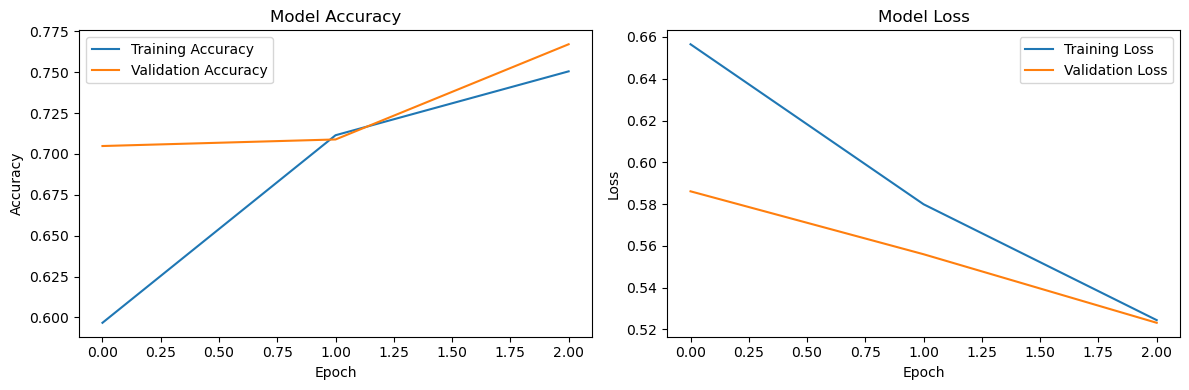

In [34]:
# Assuming you have trained your model and have a `history` object
# after fitting the model

import matplotlib.pyplot as plt

# Plot accuracy and loss graphs
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [35]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

# Assuming you have `y_val_labels` and `y_pred_labels` as the true and predicted labels

# Compute F1 score, precision, and recall
f1 = f1_score(y_val_labels, y_pred_labels, average='weighted')
precision = precision_score(y_val_labels, y_pred_labels, average='weighted')
recall = recall_score(y_val_labels, y_pred_labels, average='weighted')

print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(report)

F1 Score: 0.7643072914197754
Precision: 0.7689605997469028
Recall: 0.7670682730923695
{'Human': {'precision': 0.7564935064935064, 'recall': 0.8503649635036497, 'f1-score': 0.8006872852233677, 'support': 274.0}, 'AI': {'precision': 0.7842105263157895, 'recall': 0.6651785714285714, 'f1-score': 0.7198067632850241, 'support': 224.0}, 'accuracy': 0.7670682730923695, 'macro avg': {'precision': 0.770352016404648, 'recall': 0.7577717674661105, 'f1-score': 0.7602470242541959, 'support': 498.0}, 'weighted avg': {'precision': 0.7689605997469028, 'recall': 0.7670682730923695, 'f1-score': 0.7643072914197754, 'support': 498.0}}


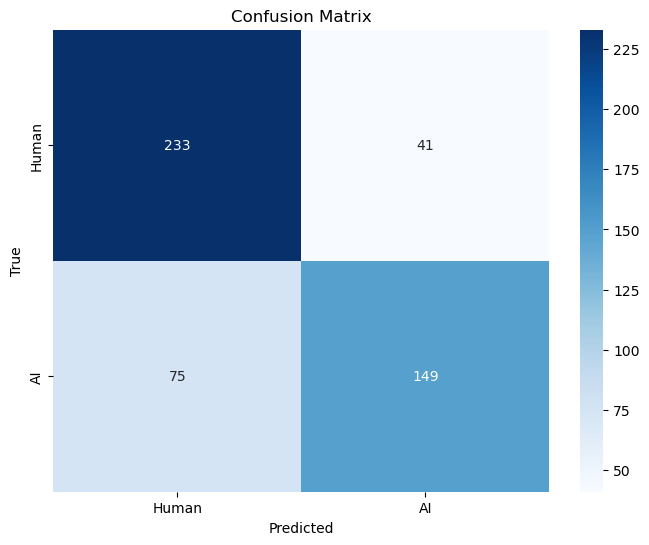

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have true labels (y_true) and predicted labels (y_pred)
# y_true = true_labels
# y_pred = predicted_labels

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_val_labels, y_pred_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Human','AI'],
            yticklabels=['Human','AI'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()